# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Citipy libriary was installed using this line pip install citipy in the conda prom.
# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [123]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [124]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | carloforte
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | banjar
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | ulladulla
Processing Record 8 of Set 1 | freetown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | mil'kovo
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | daru
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | nizhnesortymsk

Processing Record 41 of Set 4 | plainfield
Processing Record 42 of Set 4 | steamboat springs
Processing Record 43 of Set 4 | santiago de cao
Processing Record 44 of Set 4 | el quebrachal
Processing Record 45 of Set 4 | brisas de zicatela
Processing Record 46 of Set 4 | castillos
Processing Record 47 of Set 4 | mugia
Processing Record 48 of Set 4 | boyolangu
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 0 of Set 5 | yanchep
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | barma
Processing Record 3 of Set 5 | lihue
Processing Record 4 of Set 5 | feijo
Processing Record 5 of Set 5 | ono-hara
Processing Record 6 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 5 | san luis de la paz
Processing Record 8 of Set 5 | phalia
Processing Record 9 of Set 5 | sittwe
Processing Record 10 of Set 5 | inirida
Processing Record 11 of Set 5 | san antonio de pale
Processing Record 12 of Set 5 | hasaki
Processing Record 13 of Se

Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | sechura
Processing Record 37 of Set 8 | ayod
City not found. Skipping...
Processing Record 38 of Set 8 | kuching
Processing Record 39 of Set 8 | katsuura
Processing Record 40 of Set 8 | selizharovo
Processing Record 41 of Set 8 | fallon
Processing Record 42 of Set 8 | inda silase
Processing Record 43 of Set 8 | lae
Processing Record 44 of Set 8 | broken hill
Processing Record 45 of Set 8 | krasnogorskoye
Processing Record 46 of Set 8 | gisborne
Processing Record 47 of Set 8 | crane
Processing Record 48 of Set 8 | sitampiky
City not found. Skipping...
Processing Record 49 of Set 8 | taroa
Processing Record 0 of Set 9 | waingapu
Processing Record 1 of Set 9 | nelson bay
Processing Record 2 of Set 9 | colonia
Processing Record 3 of Set 9 | saint-pierre
Processing Record 4 of Set 9 | kolyshley
Processing Record 5 of Set 9 | lodja
Processing Record 6 of Set 9 | merizo village
Processing Record 7 of Set 9 | acapulco de j

Processing Record 24 of Set 12 | we
City not found. Skipping...
Processing Record 25 of Set 12 | poltavka
Processing Record 26 of Set 12 | moses lake
Processing Record 27 of Set 12 | sultanah
Processing Record 28 of Set 12 | novodvinsk
Processing Record 29 of Set 12 | tamanrasset
Processing Record 30 of Set 12 | coyhaique
Processing Record 31 of Set 12 | hlobyne
Processing Record 32 of Set 12 | jabor
Processing Record 33 of Set 12 | kendari
Processing Record 34 of Set 12 | muricay
Processing Record 35 of Set 12 | greenville
Processing Record 36 of Set 12 | ingeniero jacobacci
-----------------------------
Data Retrieval Complete      
-----------------------------


In [125]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [126]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.18,84,100,9.76,TF,1686080890
1,blackmans bay,-43.0167,147.3167,10.97,92,7,3.07,AU,1686080891
2,carloforte,39.1450,8.3058,20.31,76,23,1.67,IT,1686080891
3,yellowknife,62.4560,-114.3525,10.29,100,100,6.17,CA,1686080775
4,banjar,-8.1900,114.9675,24.39,91,58,1.99,ID,1686080892


In [127]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [128]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.18,84,100,9.76,TF,1686080890
1,blackmans bay,-43.0167,147.3167,10.97,92,7,3.07,AU,1686080891
2,carloforte,39.1450,8.3058,20.31,76,23,1.67,IT,1686080891
3,yellowknife,62.4560,-114.3525,10.29,100,100,6.17,CA,1686080775
4,banjar,-8.1900,114.9675,24.39,91,58,1.99,ID,1686080892


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

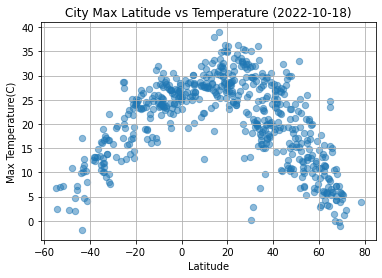

In [129]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( "Lat", "Max Temp",s=40, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

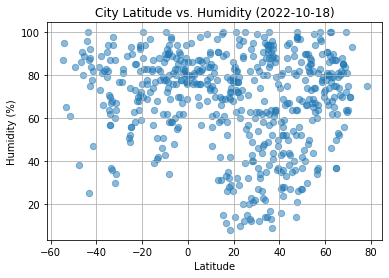

In [130]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter( "Lat", "Humidity",s=40, alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

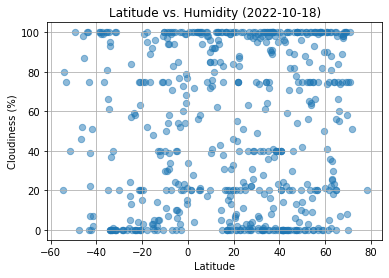

In [131]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter( "Lat", "Cloudiness", s=40, alpha=0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

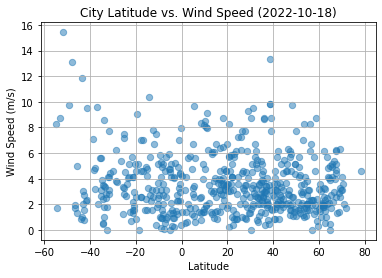

In [132]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter( "Lat", "Wind Speed", s=40, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

In [134]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,carloforte,39.1450,8.3058,20.31,76,23,1.67,IT,1686080891
3,yellowknife,62.4560,-114.3525,10.29,100,100,6.17,CA,1686080775
7,freetown,8.4840,-13.2299,27.84,78,75,2.57,SL,1686080893
9,san patricio,28.0170,-97.5169,32.31,43,4,2.79,US,1686080895
10,ola,59.5833,151.2833,7.64,72,90,0.31,RU,1686080895


In [135]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.18,84,100,9.76,TF,1686080890
1,blackmans bay,-43.0167,147.3167,10.97,92,7,3.07,AU,1686080891
4,banjar,-8.1900,114.9675,24.39,91,58,1.99,ID,1686080892
5,tual,-5.6667,132.7500,27.22,83,100,4.78,ID,1686080892
6,ulladulla,-35.3500,150.4667,10.43,79,81,2.68,AU,1686080893


In [136]:
# Define a function to create Linear Regression plots

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.556466237319318


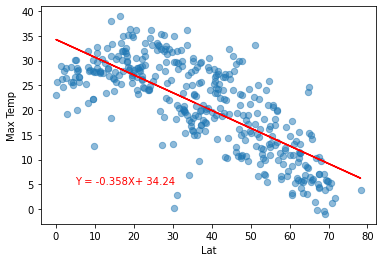

In [137]:
# Linear regression on Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

#Values of the regresion 
regress_values = northern_hemi_df["Lat"]* slope + intercept

northern_hemi_df.plot.scatter("Lat","Max Temp", s=40, alpha=0.5 )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(5,5),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.7259265655209527


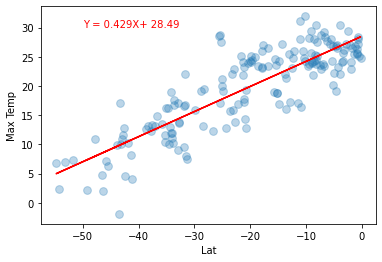

In [138]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

#Values of the regresion 
regress_values = southern_hemi_df["Lat"]* slope + intercept

southern_hemi_df.plot.scatter("Lat","Max Temp", s=60, alpha=0.3 )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Analysing the relationship between latitude and temperature, it can be observed that, both the Northern and Southern Hemispheres seem to have a linear relationship. As shown by the graph for the Northern Hemisphere as latitude increases temperature decreases with a correlation factor (r-square) of 0.556. The inverse is true for the Southern Hemisphere with an r-square of 0.726. This results are expected, as a result of the distance from the equator (lat 0), which receives the most direct sunlight along the earth’s axis, enabling regions closest to it to get the must sun radiation resulting in higher temperature. An so lower temperatures as you approach the Northern and Southern poles.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002755127354388677


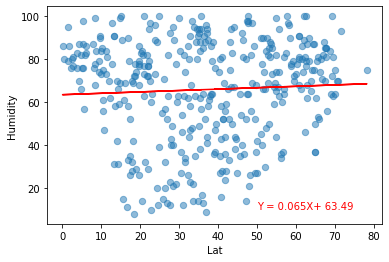

In [139]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

#Values of the regresion 
regress_values = northern_hemi_df["Lat"]* slope + intercept

northern_hemi_df.plot.scatter("Lat","Humidity", s=40, alpha=0.5 )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.0012324246658283926


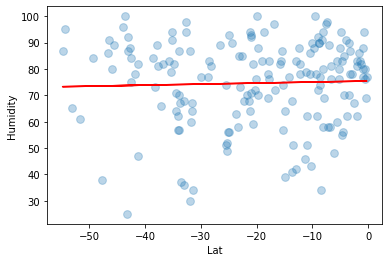

In [140]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

#Values of the regresion 
regress_values = southern_hemi_df["Lat"]* slope + intercept

southern_hemi_df.plot.scatter("Lat","Humidity", s=60, alpha=0.3 )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** From the analysis correlation graphs and linear regression line, it can be observed that there is a weak relationship between humidity and latitude. However, it seems to be still differences between the Northern and the Southern hemispheres. However, the correlations seems to be slightly stronger for the Northern hemisphere which city spread is tighter together. This phenomenon makes sense since humidity is a function of the temperature of the air, location from the nearest body of water, and the movement of the air. Temperature as shown in the previous graph is related to latitude (that may explain the small correlation). But proximity to water and air movement are not a function of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 2.0665655574780998e-05


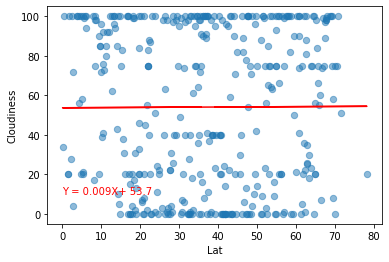

In [141]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

#Values of the regresion 
regress_values = northern_hemi_df["Lat"]* slope + intercept

northern_hemi_df.plot.scatter("Lat","Cloudiness", s=40, alpha=0.5 )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(0,10),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.0003155078592367684


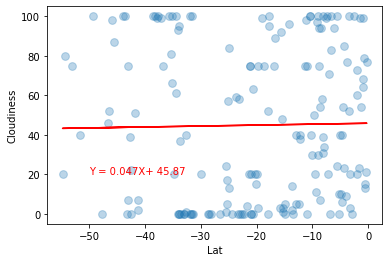

In [142]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

#Values of the regresion 
regress_values = southern_hemi_df["Lat"]* slope + intercept

southern_hemi_df.plot.scatter("Lat","Cloudiness", s=60, alpha=0.3 )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Same as in the previous analysis, a wide spread of the studied cities is displayed indistinctively for either the Northern or Southern hemispheres with minimal correlation (r-square of 0.000025 average). Therefore, we can conclude that there is not a direct relationship between cloudiness and latitude. These results were expected since cloudiness is a multifactorial variable related to a plethora of different factors such as air temperature, altitude, rainfall, and sea surface among others.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008165380522468953


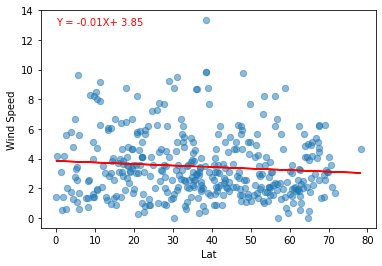

In [143]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

#Values of the regresion 
regress_values = northern_hemi_df["Lat"]* slope + intercept

northern_hemi_df.plot.scatter("Lat","Wind Speed", s=40, alpha=0.5 )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(0,13),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.05752911880940232


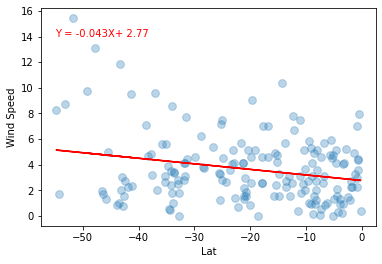

In [144]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

#Values of the regresion 
regress_values = southern_hemi_df["Lat"]* slope + intercept

southern_hemi_df.plot.scatter("Lat","Wind Speed", s=60, alpha=0.3 )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Regression analysis equation 
line_eq = "Y = " + str(round(slope,3)) + "X+ " + str(round(intercept,2))
plt.annotate(line_eq,(-55,14),c="red",fontsize=10)
print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** As observed from the graphical analysis, there is a weak relationship between latitude and wind speed.  For both the Northern and Southern hemisphere, however wind speed seems to have a wider variability with little relationship to latitude for the Northern hemisphere (r-square 0.008) compere to the Southern hemisphere (r-square of 0.058). This makes sense as wind speed is determined by the city geographical location. i.e. near the ocean, distance for mountainous bodies among other factors.